# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [29]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

In [2]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [11]:
medical.describe

<bound method NDFrame.describe of       age  sex     bmi  children  smoker  region      charges  insuranceclaim
0      19    0  27.900         0       1       3  16884.92400               1
1      18    1  33.770         1       0       2   1725.55230               1
2      28    1  33.000         3       0       2   4449.46200               0
3      33    1  22.705         0       0       1  21984.47061               0
4      32    1  28.880         0       0       1   3866.85520               1
...   ...  ...     ...       ...     ...     ...          ...             ...
1333   50    1  30.970         3       0       1  10600.54830               0
1334   18    0  31.920         0       0       0   2205.98080               1
1335   18    0  36.850         0       0       2   1629.83350               1
1336   21    0  25.800         0       0       3   2007.94500               0
1337   61    0  29.070         0       1       1  29141.36030               1

[1338 rows x 8 columns]>

__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

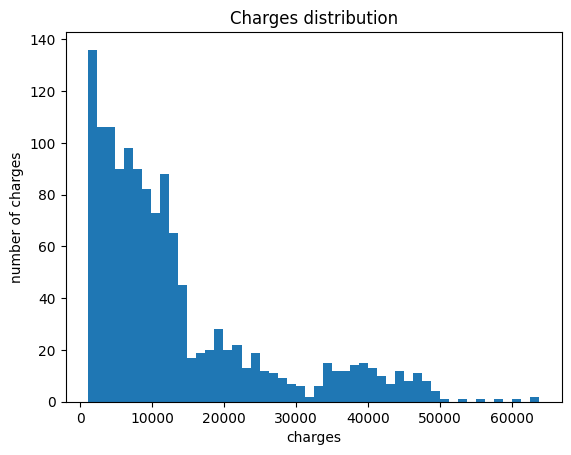

In [14]:
charges = medical['charges']

_ = plt.hist(charges, bins=50)
_ = plt.xlabel('charges')
_ = plt.ylabel('number of charges')
_ = plt.title('Charges distribution')

In [13]:
charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [10]:
mean = np.mean(charges)

std = np.std(charges)

median = np.median(charges)


print(mean, std, median)

13270.422265141257 12105.484975561612 9382.033


Comments: The data is not normally distributed and skews to the right. The mean might not be an approptiate representation since it is being "pulled" to the higher end by some outliers. The median might be better for estimating central tendency of this data set. 

Standard deviation is also affected since it is sensitive to extreme values and outliers. Standard deviations is most appropriate when data is normally distributed. 

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

Since this is a random sample it is safe to assume that the data is not influenced by biases and this sample set can be used to determine with a certain degree of conficdence that it holds the true mean "average charge"

There are a few methods that can be used on this data set to approximate the actual average charge. One of which is applying a trimmed mean. However the most appropriate method that can be used on this data set is bootstrapping. 


Post bootstrapping comments:

After applying bootstapping method if I did everything correctly it can be stated that the estimated "average charge" of the hospitals populations should be around $13,272. With a confidence interval of 0.95 that the "average charge" is between $12,628 and $13,942. Both of these values are above $12,000 which means that the hospitals administration should not be concerned about the hospital's operational mode. 

In [23]:
#Bootstrapping 
charges.sample(10000, replace=True).describe()


count    10000.000000
mean     13226.600098
std      12080.320079
min       1121.873900
25%       4744.325050
50%       9304.701900
75%      16486.225762
max      63770.428010
Name: charges, dtype: float64

In [24]:
n_bootstraps =10000

#bootstrap mean
bootstrap_mean = np.zeros(n_bootstraps)

#bootstraps

for i in range(n_bootstraps):
    bootstrap_sample = np.random.choice(charges, size=len(charges), replace=True)

    #calculate mean of bootstraps samples
    bootstrap_mean[i] = np.mean(bootstrap_sample)

#estimate of the mean
estimate_mean = np.mean(bootstrap_mean)



print(estimate_mean)


13270.568186364084


__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__
Given the nature of the administrator's concerns the appropriate confidence intervale that should be applied is a one-sided since they are concerned about the average charge falling below a lower limit of $12,000. After calculating the critical value with a relevant 95% confidence intervals using the sample mean it can be stated that the hospital administration should not be concerned since there is a high probability that the true average charge lies between $12,621.5 and $13,919.3 which is above $12,000. 

In [26]:
#95 CI
CI_lowend = np.percentile(bootstrap_mean, 2.5)
CI_highend = np.percentile(bootstrap_mean,97.5)

print(CI_highend, CI_lowend)

13946.899190118496 12629.165250027281


In [41]:
from scipy import stats
#Function to calculate confidence intervals 

def calculate_CI(data, confidence=0.95):
    sample_mean = np.mean(charges)
    sample_std = np.std(charges, ddof=1)
    n = len(charges) #sample size

    #Critical value using z-score 
    critical_v = stats.norm.ppf((1 + confidence)/2)

    #Standard error
    standard_error = sample_std/ np.sqrt(n)

    #Margin of error
    margin_of_error = critical_v * standard_error

    #Confidence intervals
    CI_lowend = sample_mean - margin_of_error
    CI_highend = sample_mean + margin_of_error

    return critical_v, CI_lowend, CI_highend

In [42]:
calculate_CI(charges, confidence=0.95)

#Critical value equals 1.95

#Confidence intervals are between $12,621.5 and $13,919.3

(1.959963984540054, 12621.54197822916, 13919.302552053354)

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__
Null Hypothesis: There is no significant difference between the means of charges those with insurance and those without insurance. 



Alternative Hypothesis: There is a statistically significant difference between the mean charges of those with insurance and those without insurance. 

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [64]:
#Here I create a subset df which only includes charges and insurranceclaim

insurance_charges = medical[["charges","insuranceclaim"]]

insurance_charges.dtypes

charges           float64
insuranceclaim      int64
dtype: object

In [65]:
#Mask for insurance charges
mask = insurance_charges["insuranceclaim"] == 1

insurance = insurance_charges[mask]

In [66]:
insurance.head()

,charges,insuranceclaim
0,16884.9240,1
1,1725.5523,1
4,3866.8552,1
6,8240.5896,1
10,2721.3208,1


In [67]:
insurance.mean()

charges           16423.928277
insuranceclaim        1.000000
dtype: float64

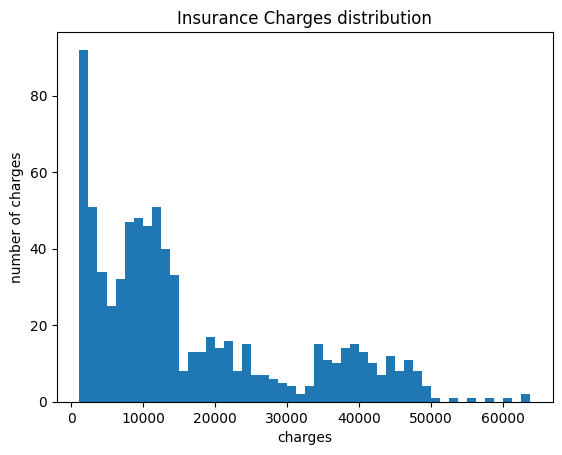

In [71]:
incharges = insurance["charges"]

_ = plt.hist(incharges, bins=50)
_ = plt.xlabel('charges')
_ = plt.ylabel('number of charges')
_ = plt.title('Insurance Charges distribution')

In [68]:
#Mask for non insurance charges
mask2 = insurance_charges["insuranceclaim"] == 0

noninsurance = insurance_charges[mask2]

In [70]:
noninsurance.mean()

charges           8821.421892
insuranceclaim       0.000000
dtype: float64

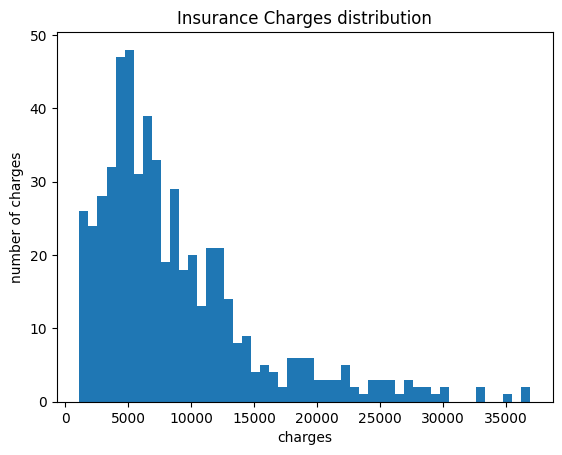

In [72]:
non_in_charges = noninsurance["charges"]

_ = plt.hist(non_in_charges, bins=50)
_ = plt.xlabel('charges')
_ = plt.ylabel('number of charges')
_ = plt.title('Insurance Charges distribution')

Performing T-test mannually and with scipy.stats 

In [75]:
#filtered_insurance = insurance["charges"]

#filtered_non_insurance = non_in_charges["charges"]

KeyError: 'charges'

In [78]:
#Might need help
def t_test(group1, group2):
    #means of groups
    group1_mean = np.mean(group1)

    group2_mean = np.mean(group2)

    #Group sizes
    group1_size = len(group1)

    group2_size = len(group2)

    #variance of groups
    group1_var = np.var(group1, ddof=1)#used ddof=1 since this is a sample and not the actual population 

    group2_var = np.var(group2, ddof=1)

    #Pooled std
    pooled_std = np.sqrt(((group1_size - 1) * group1_var + (group2_size - 1) * group2_var)/ (group1_size + group2_size - 2))

    #t statistic
    t = (group1_mean - group2_mean) / (pooled_std * np.sqrt(1/group1_size + 1/group2_size))


    #degrees of freedom
    df = group1_size + group2_size - 2

    #p-value of two-tailed test

    pvalue = 2 * (1 - stats.t.cdf(abs(t), df))

    return t, pvalue
                                       
                                
    


In [79]:
t_test(incharges, non_in_charges)

(11.893299030876712, 0.0)

In [83]:
#Using scipy function to test t-statistic and p_value

t_stat , p_value = stats.ttest_ind(incharges, non_in_charges)

print(t_stat, p_value)

11.893299030876712 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

Yes the z-test could be done using the following code:

In [ ]:
z_stat, p_value = ztest(incharges, non_in_charges)

print(z_stat, p_value)

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test